__________________________

## Notebook for Cloud Walk Risk Analysis Case

# Candidate: Fernando Cirone - 27 October 2024
#### [LinkInd](https://www.linkedin.com/in/fernandocirone/) | [GitHub](https://github.com/thecirocks) | [Portfolio](https://troopl.com/fernandocirone) | [E-mail](mailto:fernando.cirone@hotmail.com) | [WhatsApp](https://api.whatsapp.com/send?phone=5521984316148) 

____________________

## Questions

### 1) Analyze the data provided and present your conclusions. What suspicious behaviors did you find? What led you to this conclusion? What actions would you take?

#### Answer:
Risk factors/suspicious behavior associated with fraudulent transactions (has_cbk = True), according to the analysis of the provided dataset within the given time frame:  <br>

Credit Card, Device, and Spent are key factors – in chargeback frauds, fraudsters use cloned credit cards, log in as cloned clients, and spend on higher-value products (the risk vs. reward is not worth committing fraud for low-value items).;


 - Credit Card: 25% of the fraudulent transactions were made more than once with the same credit card, while this figure is only 6% for non-fraudulent transactions; 
 
 - Devices: Of the 1.996 devices that made purchases this month, only 196 are associated with fraud. Of these fraudulent devices, 26 account for 50% of all fraud cases. Special attention should be given to devices 563499, 342890, and 101848, which have 19, 15, and 15 fraudulent transactions, respectively, this month;

 - Spent: Above USD 983, there is a greater than 50% chance that the transaction is fraudulent (Logistic Regression model discovery specifically for this case);

 - Mix of 1 Unique User in Transactions: 50% of the fraudulent transactions were made 2 times or more by the same user, while in non-fraudulent transactions, this mix is only 7%.;

 - Vendors: 20 out of the 391 vendors receiving fraudulent transactions account for 52% of all fraud cases. Special attention should be given to vendors 17275, 4705, and 1308, which have 22, 19, and 15 fraudulent transactions this month, respectively; 

 - Transaction Time: While the median "last time transaction" for fraudsters' devices was 58 minutes, the median for non-fraudulent transactions was 200 minutes.;


#### Actions I would take:
 - Evaluate the possibility of requiring, without affecting revenue, a two-factor authentication method (One-Time Password, Silent Mobile Verification, Biometry), or implementing double checks in internal procedures for transactions:
    - Above USD 983;
    - for devices, users and credit card with previus fraud markdown;
    - for unique users with > 7 transactions in a month;

 - Understand, primarily, the situation with the top 20 vendors with frauds to identify why they have so many cases—take a supportive approach to uncover any security gaps. Then, gradually reach out to the other vendors, ensuring a balanced allocation of resources.

 - Determine whether the fraudulent devices may have used a VPN during the transaction; if not, mark them as suspicious devices and assess the feasibility of blocking future transactions.
 
 - Design a fraudster persona to improve the risk team's understanding:
    Persona Fraudster, in 1 month: <br>
    - USD Spent (median): 999,47; <br>
    - Number of Transactions (mode): 1; <br>
    - Number of Credit Card (mode): 1; <br>
    - Targets the most vulnerable vendor: num 17275; <br>
    - Uses the Device: num 563499; <br>


### 2) In addition to the spreadsheet data, what other data would you consider to find patterns of possible fraudulent behavior?

#### Answer, for order of importance:
- Geolocation of the transaction - important to understand the purchase pattern. If it was made in a certain location where the user is not usually located, it tends to indicate fraud;

- CPF and cellphone number information for validations: KYC Telco information - User_ID versus CPF;

- Telco SIM SWAP information - aging of the SIM SWAP event;
- VPN/proxy usage: fraudsters usually use this type of connection to hide their information;
- If the credit card is virtual or not - virtual cards tend not to be used by fraudsters;
- If the device is new/never used - more likely to be used by fraudsters;
- Credit score of the buyer: you can rely more on users with a higher credit score;
- Aging of the ID: older users are more reliable;
- Aging of the credit card: older cards could be more reliable;
- Type of product: usually, higher-ticket products tend to have a higher propensity for chargeback fraud (like smartphones) -[source](https://blogbr.clear.sale/chargeback-saiba-o-que-quais-os-riscos-e-como-evit-lo)

### 3) Considering your conclusions, what would you further suggest in order to prevent frauds and/or chargebacks?

#### Answer, for order of importance:
- Implement security measures such as KYC (Know Your Customer) and SIM swap detection to enhance the CloudWalk algorithm, providing more data for better understanding and anticipating fraudsters' behavior;

- Keep the algorithm continuously updated to adapt to changes in fraudsters' behavior;
- Hire a skilled Data Science and security team to maintain and optimize the algorithm;
- Regularly conduct security breach tests to identify and address system vulnerabilities;
- Recommend that the seller retains all documentation, including transaction receipts, delivery confirmations, chat records, and any other relevant evidence;
- Never underestimate fraudsters; they are constantly evolving;
- The Data Science team should adopt a mindset similar to that of fraudsters to anticipate potential tactics;
- Stay in contact with other market players, regulators and governament through associations to share best security practices;
- Participate in global discussion forums to improve security and reduce risk.

### 4) Create an anti-fraud solution.

#### Answer:
- Machine Learning model trained, fine-tuned (with feature engineering): Decision Tree XGBoost classifier achieving 0.80 accuracy and a recall of 0.77 for Class 1 (fraudulent transactions - most important metric and the goal of the problem);

- Tested: Logistic Regression, Random Forest, and Decision Tree. It was considered whether it was worth advancing with these models, but they either delivered below-par metrics or quickly overfitted;
- The model was developed considering the Learning Curve, Confusion Matrix, and Precision-Recall analysis;

Some tips: <br>
User_id: id of the cardholders; <br>
Device_id: device used by the cardholder; <br>
Has_cbk: transaction received a fraud chargeback or not. <br>
All the transactions occurred in a card not present environment. <br>
You can use any programming language that you want.

_____________________

Fernando assumptions: <br>
    - Transactions for e-commerce only; <br> 
    - The fraud chargeback it made by cloned or stoled credit card;

## Agenda of this notebook:
#### 0 - Import Python; <br>
#### 1 - Import csv, Business Discovery and Dataset Analysis; <br>
#### 2 - Grouping info to understand behavior; <br>
#### 3 - Machine Learning Model Solution <br>

# 0. Import Python Libraries

In [195]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc, f1_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_validate, learning_curve, train_test_split, cross_val_score
from xgboost import XGBClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import precision_recall_curve, PrecisionRecallDisplay
from sklearn.metrics import classification_report

# 1. Import csv, Business Discovery and Dataset Analysis <br>
Source: https://gist.github.com/cloudwalk-tests/76993838e65d7e0f988f40f1b1909c97#file-transactional-sample-csv

In [2]:
df = pd.read_csv('data/transactional-sample.csv', delimiter=',')
df.head(2)

,transaction_id,merchant_id,user_id,card_number,transaction_date,transaction_amount,device_id,has_cbk
0,21320398,29744,97051,434505******9116,2019-12-01T23:16:32.812632,374.56,285475.0,False
1,21320399,92895,2708,444456******4210,2019-12-01T22:45:37.873639,734.87,497105.0,True


### Features Info: <br>
    - transaction_id: identification of the transaction;
    - merchant_id: identification of the company involved on the sale;
    - user_id: identification of the user (cardholder); 
    - card_number: identification of the card in the transaction; 
    - transaction_date: data; 
    - transaction_amount: amount;
    - device_id: identification of the device;
    - has_cbk: transaction received a fraud chargeback or not.

Extra: 
### what is chargeback: <br>
Chargebacks are a type of transaction reversal that occurs when a customer disputes a charge with their bank or credit card company. Chargebacks can occur for a variety of reasons, such as fraud, dissatisfaction with a product or service, or errors made by the business. When a chargeback occurs, the customer’s bank or credit card company refunds the disputed amount to the customer and deducts the amount from the business’s account.

For businesses, chargebacks can result in financial losses, damage to their reputation, higher fees from payment processors, and even losing the ability to accept credit card payments. To compound these issues, fraudulent actors sometimes use chargebacks as a tool to steal from businesses.

### What is FRAUD chargeback: <br>

Chargeback fraud occurs when a customer intentionally disputes a charge in order to receive a refund, while keeping the product or service. The customer may claim they did not receive the product, that the product was defective, or that the transaction was unauthorized. There are several types of chargeback fraud, including:


Friendly fraud <br>
Friendly fraud occurs when a cardholder makes a legitimate purchase but later disputes the charge, claiming they did not authorize it or that the goods or services were not as described. Sometimes this happens when the cardholder forgets that they made the charge, doesn’t recognize it on the billing statement, and assumes it was fraud. In some cases of friendly fraud, the cardholder may even receive the merchandise and then file a chargeback, claiming that they never received it.

Return fraud <br>
Return fraud happens when an individual returns an item to a retailer, claiming that the product is faulty, defective, or otherwise not satisfactory—despite the fact that the product is in good condition or has been tampered with (or used). This often accompanies a chargeback request, particularly if the retailer’s return policy is unclear.

Digital-goods chargebacks <br>
Digital-goods fraud occurs when a customer disputes a charge for a digital product, such as a software license or online course, after accessing and using the product. This can be difficult for businesses to prevent, since the customer may have already downloaded the product—but the business cannot know this for certain.

Subscription fraud <br>
Subscription fraud occurs when a customer disputes a recurring charge for a subscription service, such as a streaming service, after receiving several months of service. The customer may claim they did not authorize the recurring charge or that they canceled the subscription but were still charged.


Source: https://stripe.com/br/resources/more/chargeback-fraud-101

### A diferença entre chargeback, estorno e reembolso

Chargeback (cliente x operador) <br>
‍É a contestação de uma transação feita com cartão de crédito solicitado pelo cliente final diretamente ao banco emissor daquele cartão

Estorno (cliente x vendedor, feito pelo cliente) <br>
‍O estorno é uma solução amigável entre vendedor e comprador. Onde é feita a devolução da quantia investida por: atraso na entrega, cobrança duplicada ou até uma compra feita por engano.

Reembolso (cliente x vendedor, feito pelo vendedor)<br>
‍O reembolso é bem parecido com o estorno, mas a ação de cancelamento parte do vendedor. Pode ocorrer por exemplo: quando não se tem o produto no estoque e por um erro o anúncio não foi retirado.

Source: <br> 
(1) https://www.infinitepay.io/blog/o-que-e-chargeback-e-como-ele-influencia-no-seu-negocio <br>
(2) https://www.infinitepay.io/blog/chargeback-como-reverter-uma-contestacao-de-venda <br>
(3) https://blogbr.clear.sale/chargeback-saiba-o-que-quais-os-riscos-e-como-evit-lo

Diferença de um Chargeback, reembolso e estorno:

O reembolso é uma devolução do dinheiro gasto pelo cliente, efetuado pela própria empresa que realizou a venda, por algum tipo de problema com o produto ou serviço, de maneira totalmente amigável, na maioria das vezes.

O estorno, por sua vez, envolve a operadora do cartão, que solicita à loja ou à prestadora do serviço que cancele a transação. Isto é, ocorre quando a própria loja devolve o dinheiro para o consumidor por meio de sua plataforma de processamento de pagamentos, seja por devolução do produto, desistência da compra e outras causas.

Enquanto isso, o chargeback acontece quando o cliente, sem entrar em contato com a loja, solicita o cancelamento da transação diretamente na administradora do cartão, que fica responsável por devolver o dinheiro ao consumidor. Nesse caso, o estabelecimento pode demorar meses para saber que isso aconteceu e que ficou com esse prejuízo.

Source: https://blogbr.clear.sale/chargeback-saiba-o-que-quais-os-riscos-e-como-evit-lo

### Important bussiness conclusion from Discovery Phase: 
- The most critical factor associated with chargeback fraud is the payment method, specifically credit cards (cloned, phished, or leaked). This factor should be prioritized over other features when analyzing the data, such as user ID, seller ID, etc. 
- In a typical scenario, the client's credit card information is leaked, allowing the burgler to purchase high-value products. The client, having never made the purchase, then requests a chargeback from the card issuer to get their money back (FRAUD!).

Source: <br> 
(1) https://stripe.com/br/resources/more/chargeback-fraud-101 <br> 
(2) https://www.lightspeedhq.com/blog/credit-card-chargebacks/ <br>
(3) https://blogbr.clear.sale/chargeback-saiba-o-que-quais-os-riscos-e-como-evit-lo

### Analysis of dataset

In [3]:
df.shape

(3199, 8)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3199 entries, 0 to 3198
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   transaction_id      3199 non-null   int64  
 1   merchant_id         3199 non-null   int64  
 2   user_id             3199 non-null   int64  
 3   card_number         3199 non-null   object 
 4   transaction_date    3199 non-null   object 
 5   transaction_amount  3199 non-null   float64
 6   device_id           2369 non-null   float64
 7   has_cbk             3199 non-null   bool   
dtypes: bool(1), float64(2), int64(3), object(2)
memory usage: 178.2+ KB


In [5]:
df.duplicated().value_counts()

False    3199
Name: count, dtype: int64

In [6]:
df.describe()

,transaction_id,merchant_id,user_id,transaction_amount,device_id
count,3.199000e+03,3199.000000,3199.000000,3199.000000,2369.000000
mean,2.132200e+07,48771.128790,50891.077212,767.812904,493924.859856
std,9.236161e+02,29100.360839,29515.282827,889.095904,283785.584545
min,2.132040e+07,16.000000,6.000000,1.220000,2.000000
25%,2.132120e+07,23426.000000,24267.500000,205.235000,259344.000000
50%,2.132200e+07,48752.000000,52307.000000,415.940000,495443.000000
75%,2.132280e+07,73915.000000,76837.000000,981.680000,733243.000000
max,2.132360e+07,99799.000000,99974.000000,4097.210000,999843.000000


In [7]:
df.isnull().value_counts()

transaction_id  merchant_id  user_id  card_number  transaction_date  transaction_amount  device_id  has_cbk
False           False        False    False        False             False               False      False      2369
                                                                                         True       False       830
Name: count, dtype: int64

In [8]:
df.isna().sum()

transaction_id          0
merchant_id             0
user_id                 0
card_number             0
transaction_date        0
transaction_amount      0
device_id             830
has_cbk                 0
dtype: int64

In [9]:
df["device_id"].isnull().value_counts()

device_id
False    2369
True      830
Name: count, dtype: int64

In [10]:
df["device_id"].isnull().value_counts() / df["device_id"].isnull().value_counts().sum()

device_id
False    0.740544
True     0.259456
Name: count, dtype: float64

☝️ 26% of device_id feature it is null - better analysis bellow

In [11]:
# df["device_id"][df["has_cbk"]==True].isnull().value_counts()

In [12]:
df.head(2)

,transaction_id,merchant_id,user_id,card_number,transaction_date,transaction_amount,device_id,has_cbk
0,21320398,29744,97051,434505******9116,2019-12-01T23:16:32.812632,374.56,285475.0,False
1,21320399,92895,2708,444456******4210,2019-12-01T22:45:37.873639,734.87,497105.0,True


### Understanding the time period

In [13]:
df[["transaction_date"]].head(2)

,transaction_date
0,2019-12-01T23:16:32.812632
1,2019-12-01T22:45:37.873639


In [14]:
df["transaction_date"].dtype

dtype('O')

In [15]:
df["transaction_date"] = pd.to_datetime(df["transaction_date"])

In [16]:
df["transaction_date"].dtype

dtype('<M8[ns]')

In [17]:
df[["transaction_date"]].head(2)

,transaction_date
0,2019-12-01 23:16:32.812632
1,2019-12-01 22:45:37.873639


In [18]:
df["transaction_date"].min()

Timestamp('2019-11-01 01:27:15.811098')

In [19]:
df["transaction_date"].max()

Timestamp('2019-12-01 23:16:32.812632')

### The transactions were made in 30 days !

### Analyzing fraudulent transactions

In [20]:
unique_fraud_transactions = df[df["has_cbk"] == True]["transaction_id"].nunique()
unique_non_fraud_transactions = df[df["has_cbk"] == False]["transaction_id"].nunique()
transaction = df["transaction_id"].nunique()

print(f'There are {transaction} transactions')
print(f'There are {unique_fraud_transactions} fraudulent transactions, corresponding to {unique_fraud_transactions/transaction*100:.2f} percent')
print(f'There are {unique_non_fraud_transactions} non-fraudulent transactions, corresponding to {unique_non_fraud_transactions/transaction*100:.2f} percent')

There are 3199 transactions
There are 391 fraudulent transactions, corresponding to 12.22 percent
There are 2808 non-fraudulent transactions, corresponding to 87.78 percent


### Overall numbers <br>
Interval of time ? 30 days; <br>
How many Unique Transactions ? 3199; <br>
How many Unique Users Id? 2704; <br>
How many Unique Devices ? 1996; <br>
How many Unique Merchants ? 1756 <br>
How many Unique Credict Cards ? 2925 <br>
Min Transaction Ammount ? 1.22 <br>
Max transaction Ammount ? 4097.21 <br>
Mean transaction Ammount ? 767.81 <br>
Median transaction Ammount ? 415.94 <br>
Std transaction Ammount ? 889.10 <br>

In [21]:
#Transforming to datetime because it was in other format
df["transaction_date"] = pd.to_datetime(df["transaction_date"])

In [22]:
transaction = df["transaction_id"].nunique()
user = df["user_id"].nunique()
device = df["device_id"].nunique()
vendor = df["merchant_id"].nunique()
card = df["card_number"].nunique()
time = df["transaction_date"].max() - df["transaction_date"].min()
min = df["transaction_amount"].min()
max = df["transaction_amount"].max()
mean = df["transaction_amount"].mean()
median = df["transaction_amount"].median()
std = df["transaction_amount"].std()

print(f'Unique transaction_id: {transaction}')
print(f'Unique user_id: {user}')
print(f'Unique device_id: {device}')
print(f'Unique merchant_id: {vendor}')
print(f'Unique card_number: {card}')
print(f'Time interval: {time}')
print(f'Min spent: {min}')
print(f'Max spent: {max}')
print(f'Mean: {mean:.2f}')
print(f'Median: {median:.2f}')
print(f'Std: {std:.2f}')

Unique transaction_id: 3199
Unique user_id: 2704
Unique device_id: 1996
Unique merchant_id: 1756
Unique card_number: 2925
Time interval: 30 days 21:49:17.001534
Min spent: 1.22
Max spent: 4097.21
Mean: 767.81
Median: 415.94
Std: 889.10


In [23]:
card_per_user = card / user
device_per_user =   device / user
transaction_per_user = transaction / user

print(f'card_per_user: {card_per_user}')
print(f'device_per_user: {device_per_user}')
print(f'user_per_transaction: {transaction_per_user}')

card_per_user: 1.0817307692307692
device_per_user: 0.7381656804733728
user_per_transaction: 1.1830621301775148


### Analysis and Logistic Regression to Understand Probas of Fraudulent Payment Behavior.

In [24]:
all_spent = df["transaction_amount"]
fraud_spent = df["transaction_amount"][df["has_cbk"] == True]
nofraud_spent = df["transaction_amount"][df["has_cbk"] == False]

median_fraud = fraud_spent.median()
median_nofraud = nofraud_spent.median()

print(f'Median Fraud: {median_fraud}')
print(f'Median_nofraud: {median_nofraud}')

Median Fraud: 999.47
Median_nofraud: 360.315


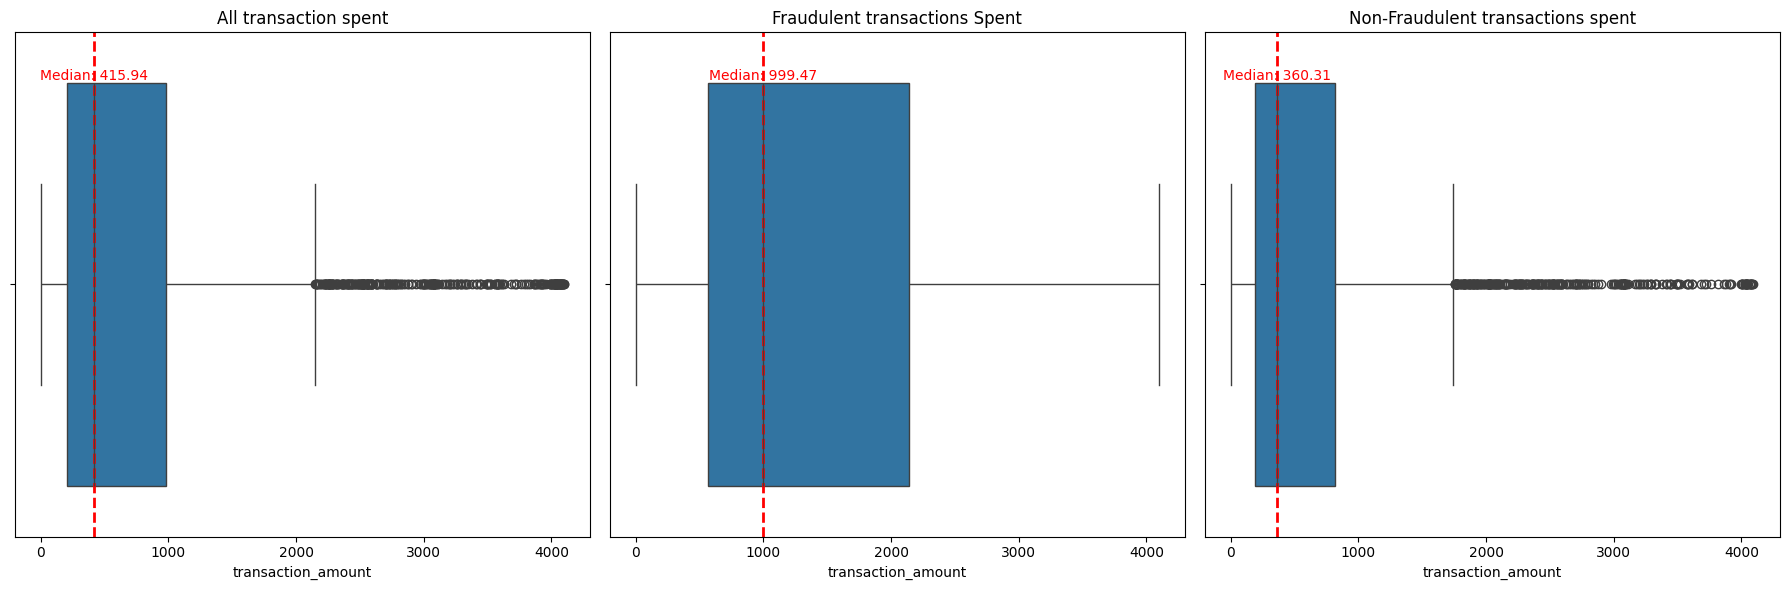

In [25]:
# Criar a figura com três subplots lado a lado
fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharex=True)

# Plotagem para todas as transações
sns.boxplot(x=all_spent, ax=axes[0])
axes[0].axvline(x=median, color='red', linestyle='dashed', linewidth=2)
axes[0].text(median, -0.40, f'Median: {median:.2f}', color='red', ha='center', va='bottom')
axes[0].set_title("All transaction spent")

# Plotagem para transações fraudulentas
sns.boxplot(x=fraud_spent, ax=axes[1])
axes[1].axvline(x=median_fraud, color='red', linestyle='dashed', linewidth=2)
axes[1].text(median_fraud, -0.40, f'Median: {median_fraud:.2f}', color='red', ha='center', va='bottom')
axes[1].set_title("Fraudulent transactions Spent")

# Plotagem para transações não fraudulentas
sns.boxplot(x=nofraud_spent, ax=axes[2])
axes[2].axvline(x=median_nofraud, color='red', linestyle='dashed', linewidth=2)
axes[2].text(median_nofraud, -0.40, f'Median: {median_nofraud:.2f}', color='red', ha='center', va='bottom')
axes[2].set_title("Non-Fraudulent transactions spent")

# Ajustar layout para não sobrepor os elementos
plt.tight_layout()
plt.show()

In [26]:
fraud_spent.quantile(0.75)

np.float64(2140.68)

In [27]:
#non fraud Quartile spent analysis
q1 = nofraud_spent.quantile(0.25)
q3 = nofraud_spent.quantile(0.75)
print(q1)
print(q3)

191.285
812.5775


In [28]:
iqr = q3 - q1

upper_limit = q3 + 1.5 * iqr

print(f"The upper limit of the fourth quartile for Non-Fraud spent is: {upper_limit}")

The upper limit of the fourth quartile for Non-Fraud spent is: 1744.5162500000001


 ☝️ Fraudulent transactions tend to be with higher ticket: median of 1.000 rather than non fraudulent: 360.
While the 4o Quartile limit distribuition of Non Fraudulent it is 

Important: <br>
    - 0 for NON Fraud <br>
    - 1 for Fraud <br>

In [29]:
df["has_cbk"] = df["has_cbk"].apply(lambda x: 1 if x == True else 0)
df["has_cbk"].unique()

array([0, 1])

In [30]:
X = df["transaction_amount"].values.reshape(-1, 1) #ajustar o shape pois DF estava em espaço >2Bi
y = df["has_cbk"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [31]:
# model1 = LogisticRegression() #Unbalanced dataset ~12% fraudulent transactions
# model1.fit(X_train, y_train)
# y_pred = model1.predict(X_test)
# f1_1 = f1_score(y_test, y_pred)
# print(f1_1)

0.17142857142857143


In [32]:
model2 = LogisticRegression(class_weight='balanced') #Unbalanced dataset ~12% fraudulent transactions
model2.fit(X_train, y_train)
y_pred = model2.predict(X_test)
f1_2 = f1_score(y_test, y_pred)
print(f1_2)

0.367816091954023


#### ☝️ Observation: Model with balanced dataset performed better than without balancing

In [33]:
proba = model2.predict_proba(X_test)
print(proba)

[[0.47927225 0.52072775]
 [0.13471534 0.86528466]
 [0.52667163 0.47332837]
 ...
 [0.68894483 0.31105517]
 [0.53366257 0.46633743]
 [0.58973234 0.41026766]]


In [34]:
proba_fraud = proba[:,1]
proba_fraud

array([0.52072775, 0.86528466, 0.47332837, 0.31102539, 0.35923129,
       0.35662234, 0.34240315, 0.70514913, 0.50771112, 0.37782225,
       0.34925356, 0.39683824, 0.34500633, 0.65959885, 0.41711074,
       0.35320176, 0.51855503, 0.65426453, 0.57898626, 0.57833863,
       0.68047317, 0.3530244 , 0.68560448, 0.8935037 , 0.40489792,
       0.34994302, 0.3278146 , 0.3390654 , 0.74891649, 0.3737043 ,
       0.60747197, 0.37028657, 0.36453281, 0.39766213, 0.32138925,
       0.35298894, 0.76672563, 0.33411781, 0.36301197, 0.45076236,
       0.48689379, 0.35346507, 0.88692512, 0.5013592 , 0.43831118,
       0.40529579, 0.88719369, 0.3469704 , 0.35853174, 0.63178338,
       0.38722912, 0.36663123, 0.34160308, 0.34717414, 0.52038302,
       0.47116103, 0.63977555, 0.85612054, 0.84586806, 0.39193265,
       0.58161182, 0.57087108, 0.42795285, 0.61890111, 0.34517442,
       0.34589895, 0.38497998, 0.74395722, 0.35516473, 0.4296444 ,
       0.4414143 , 0.41575615, 0.3704257 , 0.33268465, 0.40185

In [35]:
intercept = model2.intercept_
coef = model2.coef_
print(intercept)
print(coef)

[-0.80374815]
[[0.00081731]]


In [36]:
limit_50 = intercept / coef
limit_50 = limit_50 *-1
limit_50 = limit_50[0][0]
print(limit_50)

983.4079247213097


### Above 983 spent there are >50% chance of the transaction be classified as fraudulent

In [37]:
values = np.linspace(X.min(), X.max()+5000, 100).reshape(-1, 1)
probabilities = model2.predict_proba(values)[:, 1]

In [38]:
print(values)

[[1.22000000e+00]
 [9.30986869e+01]
 [1.84977374e+02]
 [2.76856061e+02]
 [3.68734747e+02]
 [4.60613434e+02]
 [5.52492121e+02]
 [6.44370808e+02]
 [7.36249495e+02]
 [8.28128182e+02]
 [9.20006869e+02]
 [1.01188556e+03]
 [1.10376424e+03]
 [1.19564293e+03]
 [1.28752162e+03]
 [1.37940030e+03]
 [1.47127899e+03]
 [1.56315768e+03]
 [1.65503636e+03]
 [1.74691505e+03]
 [1.83879374e+03]
 [1.93067242e+03]
 [2.02255111e+03]
 [2.11442980e+03]
 [2.20630848e+03]
 [2.29818717e+03]
 [2.39006586e+03]
 [2.48194455e+03]
 [2.57382323e+03]
 [2.66570192e+03]
 [2.75758061e+03]
 [2.84945929e+03]
 [2.94133798e+03]
 [3.03321667e+03]
 [3.12509535e+03]
 [3.21697404e+03]
 [3.30885273e+03]
 [3.40073141e+03]
 [3.49261010e+03]
 [3.58448879e+03]
 [3.67636747e+03]
 [3.76824616e+03]
 [3.86012485e+03]
 [3.95200354e+03]
 [4.04388222e+03]
 [4.13576091e+03]
 [4.22763960e+03]
 [4.31951828e+03]
 [4.41139697e+03]
 [4.50327566e+03]
 [4.59515434e+03]
 [4.68703303e+03]
 [4.77891172e+03]
 [4.87079040e+03]
 [4.96266909e+03]
 [5.054547

In [39]:
print(probabilities)

[0.30943735 0.32570893 0.34241187 0.35951468 0.37698201 0.39477492
 0.41285112 0.43116536 0.44966983 0.46831463 0.48704833 0.50581849
 0.52457226 0.54325699 0.56182077 0.58021307 0.59838523 0.61629097
 0.63388684 0.65113256 0.66799142 0.68443042 0.70042051 0.71593664
 0.73095783 0.7454671  0.7594514  0.77290145 0.78581155 0.79817937
 0.81000571 0.82129421 0.83205107 0.84228477 0.85200582 0.86122641
 0.86996021 0.87822206 0.88602777 0.8933939  0.90033749 0.90687596
 0.91302691 0.91880796 0.92423663 0.92933024 0.93410583 0.93858003
 0.94276904 0.94668858 0.95035382 0.95377937 0.95697926 0.95996692
 0.96275517 0.96535623 0.96778172 0.97004266 0.97214951 0.97411214
 0.97593989 0.97764155 0.97922543 0.98069932 0.98207055 0.98334602
 0.98453219 0.9856351  0.98666044 0.98761351 0.98849928 0.98932239
 0.99008719 0.99079771 0.99145775 0.99207082 0.99264022 0.99316901
 0.99366005 0.994116   0.99453935 0.99493238 0.99529727 0.99563599
 0.99595042 0.99624228 0.99651318 0.99676461 0.99699796 0.9972

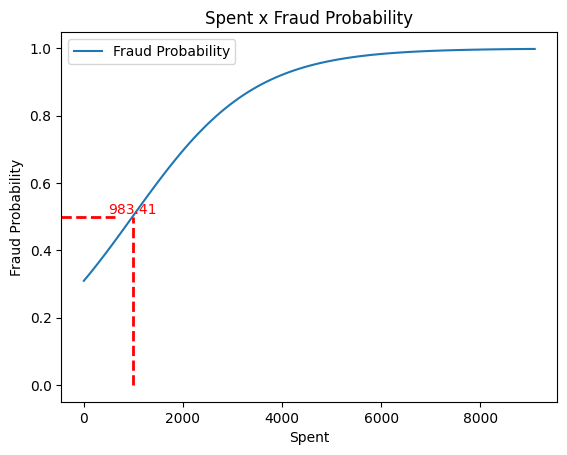

In [40]:
plt.plot(values, probabilities, label="Fraud Probability")
plt.plot([limit_50, limit_50], [0, 0.5], color='red', linestyle='dashed', linewidth=2)
plt.axhline(y=0.5, xmax=limit_50 / values.max(), color='red', linestyle='dashed', linewidth=2)
plt.text(limit_50, 0.5, f'{limit_50:.2f}', color='red', fontsize=10, ha='center', va='bottom')

plt.xlabel("Spent")
plt.ylabel("Fraud Probability")
plt.title("Spent x Fraud Probability")
plt.legend()
plt.show()

In [224]:
# Obter os coeficientes do modelo treinado
intercept = model2.intercept_[0]
coef = model2.coef_[0][0]

# Calcular o ponto onde a probabilidade de fraude é 50%
threshold_spent = -intercept / coef

print(f"The spent where the PROBA of fraud is 50% is: {threshold_spent:.2f}")

The spent where the PROBA of fraud is 50% is: 983.41


### ☝️ Bingo !

### Analysis of missing device in fraudulent transactions

In [42]:
df["device_id"].isnull().value_counts() / df["device_id"].isnull().value_counts().sum()

device_id
False    0.740544
True     0.259456
Name: count, dtype: float64

### 26% of device is missing

In [43]:
df["device_id"].isnull().value_counts()

device_id
False    2369
True      830
Name: count, dtype: int64

In [44]:
df["device_id"][df["has_cbk"] == True].isnull().value_counts()

device_id
False    324
True      67
Name: count, dtype: int64

In [45]:
df["device_id"][df["has_cbk"] == False].isnull().value_counts()

device_id
False    2045
True      763
Name: count, dtype: int64

In [46]:
missing_dev_nonfraud = df["device_id"][df["has_cbk"] == False].isnull().value_counts().get(True, 0)
missing_dev_yesfraud = df["device_id"][df["has_cbk"] == True].isnull().value_counts().get(True, 0)
miff_dev_all = df["device_id"].isnull().value_counts().get(True, 0)

print(f'Share of missing device feature it NON Fraudulent transactions: {missing_dev_nonfraud/miff_dev_all*100:.0f} %')
print(f'Share of missing device feature it NON Fraudulent transactions: {missing_dev_yesfraud/miff_dev_all*100:.0f} %')


Share of missing device feature it NON Fraudulent transactions: 92 %
Share of missing device feature it NON Fraudulent transactions: 8 %


### Despite of the missing devices are mostly at non fraudly transactions 92%, not beeing a influent factor for fraudulent transactions, I will keep these information because we do not have a lot of features (just 8) and the dataset has not a lot of historic (only 30 days and 3k rows). Dropping this feature may negatively impact the model.

### Takeaways from these brief KPIs: 
- DO NOT DROP DEVICE: The device it is important for business problem. Solution: create categorical flag (missing device) and use specific model that handles missing data (Decision Tree / Deep Learning). Context: device per user it is < 1 witch it is impossible. The reason for this: incomplete database (25% of device row NA); <br> 
- Transaction per user: the users made few transaction (1.2 transaction per user) <br> 
- Time interval: the dataset has only 30 days (and 3k rows); <br>
- The spending is highly dispersed, with a standard deviation of 889.10 and a mean of 767

### Encoding missing device to get ready for Model in future

In [47]:
df.head(2)

,transaction_id,merchant_id,user_id,card_number,transaction_date,transaction_amount,device_id,has_cbk
0,21320398,29744,97051,434505******9116,2019-12-01 23:16:32.812632,374.56,285475.0,0
1,21320399,92895,2708,444456******4210,2019-12-01 22:45:37.873639,734.87,497105.0,1


Important: <br>
    - 0 for NOT Missing <br>
    - 1 for Missin <br>

In [48]:
df["device_id_missing"] = df["device_id"].apply(lambda x: 1 if pd.isnull(x) else 0)
df["device_id_missing"].unique()

array([0, 1])

In [49]:
df[df["device_id"].isnull()].head(2)

,transaction_id,merchant_id,user_id,card_number,transaction_date,transaction_amount,device_id,has_cbk,device_id_missing
2,21320400,47759,14777,425850******7024,2019-12-01 22:22:43.021495,760.36,NaN,0,1
3,21320401,68657,69758,464296******3991,2019-12-01 21:59:19.797129,2556.13,NaN,1,1


# 2. Grouping info to understand behavior

In [50]:
df.head(2)

,transaction_id,merchant_id,user_id,card_number,transaction_date,transaction_amount,device_id,has_cbk,device_id_missing
0,21320398,29744,97051,434505******9116,2019-12-01 23:16:32.812632,374.56,285475.0,0,0
1,21320399,92895,2708,444456******4210,2019-12-01 22:45:37.873639,734.87,497105.0,1,0


### 👇 Distribution of the number of transactions made by 1 user:

In [51]:
#Non Fraudster:
transaction_1user_no_fraud = df[df["has_cbk"] == 0].groupby("user_id")["transaction_id"].count()
transaction_1user_no_fraud

user_id
6        1
7        1
8        1
19       1
132      1
        ..
99851    1
99863    1
99875    1
99948    1
99974    1
Name: transaction_id, Length: 2584, dtype: int64

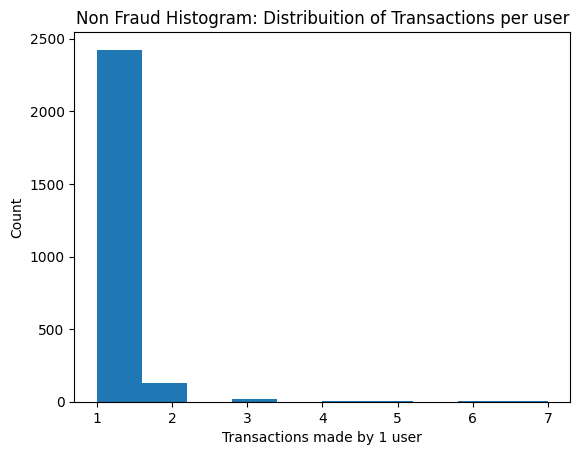

In [52]:
plt.hist(transaction_1user_no_fraud)
plt.title("Non Fraud Histogram: Distribuition of Transactions per user")
plt.xlabel("Transactions made by 1 user")
plt.ylabel("Count");

In [53]:
(transaction_1user_no_fraud == 1).sum()

np.int64(2424)

In [54]:
(transaction_1user_no_fraud == 1).sum() / len(transaction_1user_no_fraud)

np.float64(0.9380804953560371)

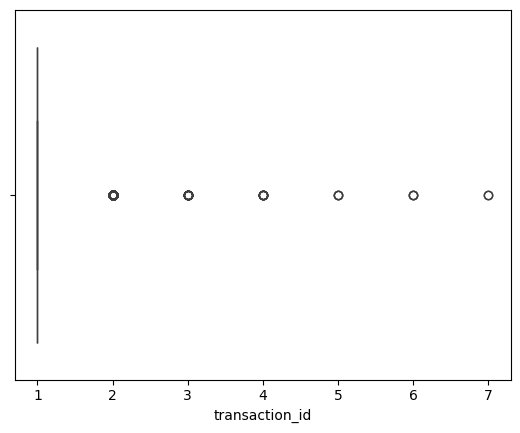

In [55]:
sns.boxplot(x=transaction_1user_no_fraud);

No fraudster: There are no registers for > 7 transactions for 1 unique user

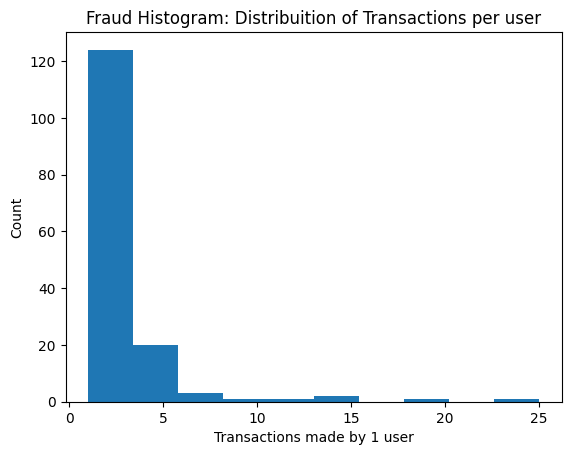

In [56]:
#Fraudster:
transaction_1user_yes_fraud = df[df["has_cbk"] == 1].groupby("user_id")["transaction_id"].count()

plt.hist(transaction_1user_yes_fraud)
plt.title("Fraud Histogram: Distribuition of Transactions per user")
plt.xlabel("Transactions made by 1 user")
plt.ylabel("Count");


In [57]:
(transaction_1user_yes_fraud == 1).sum()/ len(transaction_1user_yes_fraud)

np.float64(0.49019607843137253)

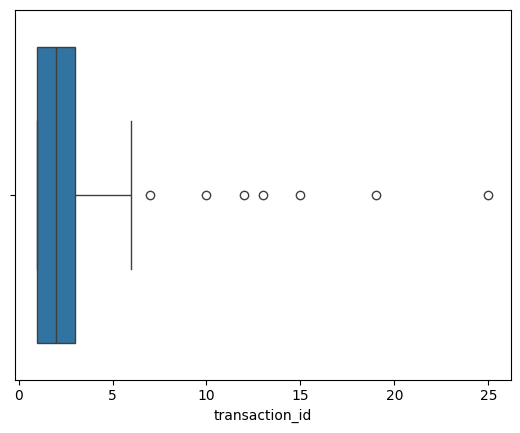

In [58]:
sns.boxplot(x=transaction_1user_yes_fraud);

### ☝️ Conclusions regarding transactions per user:
  - Non Frauds transactions: 93% of the transactions are made by 1 unique user
  - Frauds transactions: 49% of transactions are made by 1 unique user

### 👇 Distribution of the number of transactions made by credit card:

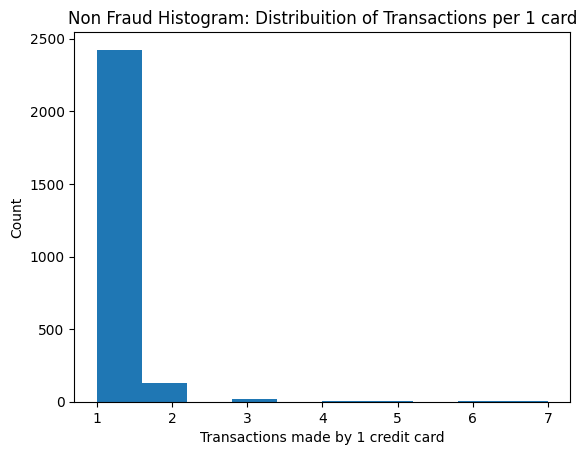

In [59]:
#No Fraudster
transaction_1card_no_fraud = df[df["has_cbk"] == 0].groupby("card_number")["transaction_id"].count()
plt.hist(transaction_1user_no_fraud)
plt.title("Non Fraud Histogram: Distribuition of Transactions per 1 card")
plt.xlabel("Transactions made by 1 credit card")
plt.ylabel("Count");

In [60]:
(transaction_1card_no_fraud == 1).sum() / len(transaction_1card_no_fraud)

np.float64(0.9548532731376975)

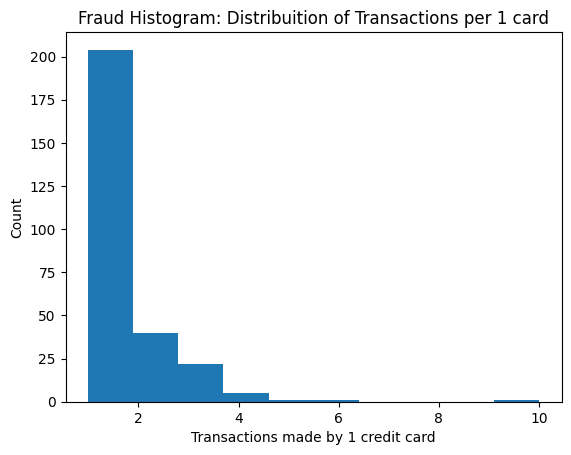

In [61]:
#Yes Fraudster
transaction_1card_yes_fraud = df[df["has_cbk"] == 1].groupby("card_number")["transaction_id"].count()
plt.hist(transaction_1card_yes_fraud)
plt.title("Fraud Histogram: Distribuition of Transactions per 1 card")
plt.xlabel("Transactions made by 1 credit card")
plt.ylabel("Count");

In [62]:
(transaction_1card_yes_fraud == 1).sum() / len(transaction_1card_yes_fraud)

np.float64(0.7445255474452555)

### ☝️ Conclusions regarding transactions per user:
  - Non Frauds transactions: 94% of the transactions are made by 1 credit card
  - Frauds transactions: 75% of transactions are made by 1 unique credit card

### 👇Transactions per Unique vendor 

In [63]:
# FRAUDs Transactions per unique vendor
frauds_per_vendor = df[df["has_cbk"] == 1].groupby("merchant_id")["transaction_id"].count()
frauds_per_vendor

merchant_id
1017      1
1175      1
1308     15
2842      1
3109      1
         ..
96692     1
97291     4
98272     3
99510     7
99644     1
Name: transaction_id, Length: 118, dtype: int64

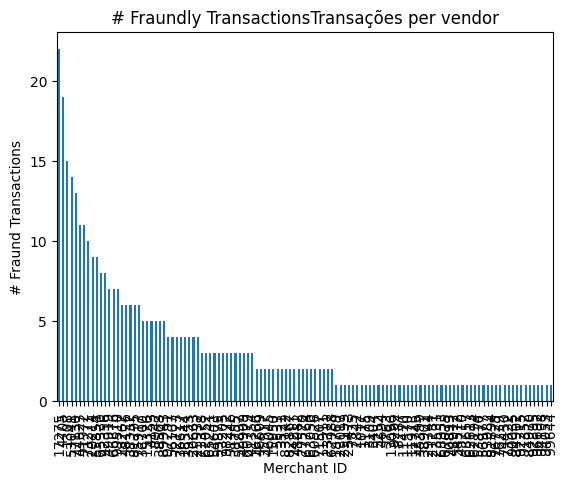

In [64]:
frauds_per_vendor_sorted = frauds_per_vendor.sort_values(ascending=False)

frauds_per_vendor_sorted.plot(kind='bar')
plt.title("# Fraundly TransactionsTransações per vendor")
plt.xlabel("Merchant ID")
plt.ylabel("# Fraund Transactions");

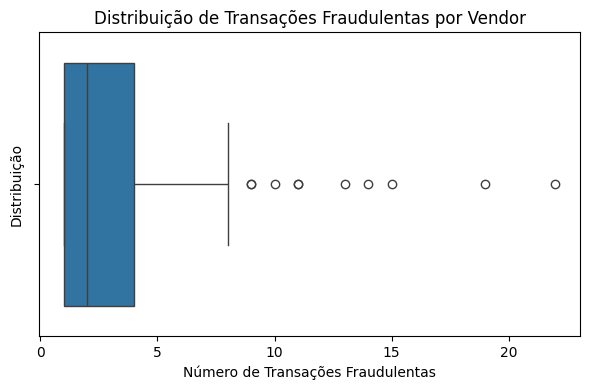

In [65]:
# Ordenar as fraudes por vendedor (do maior para o menor)
frauds_per_vendor_sorted = frauds_per_vendor.sort_values(ascending=False)

# Plotar o boxplot
plt.figure(figsize=(6, 4))
sns.boxplot(x=frauds_per_vendor_sorted)
plt.title("Distribuição de Transações Fraudulentas por Vendor")
plt.xlabel("Número de Transações Fraudulentas")
plt.ylabel("Distribuição")

# Ajustar layout e exibir o gráfico
plt.tight_layout()
plt.show()

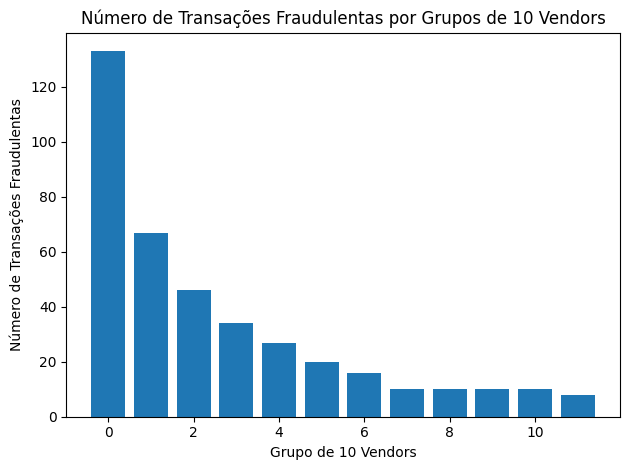

In [66]:
frauds_per_vendor_sorted = frauds_per_vendor.sort_values(ascending=False)

grouped_frauds = frauds_per_vendor_sorted.groupby(np.arange(len(frauds_per_vendor_sorted)) // 10).sum()

plt.bar(range(len(grouped_frauds)), grouped_frauds)
plt.title("Número de Transações Fraudulentas por Grupos de 10 Vendors")
plt.xlabel("Grupo de 10 Vendors")
plt.ylabel("Número de Transações Fraudulentas")

plt.tight_layout()
plt.show()

In [67]:
frauds_per_vendor_sorted.sum()

np.int64(391)

In [68]:
frauds_per_vendor_sorted

merchant_id
17275    22
4705     19
1308     15
53041    14
77130    13
         ..
92895     1
96692     1
94198     1
94053     1
99644     1
Name: transaction_id, Length: 118, dtype: int64

In [69]:
frauds_per_vendor_sorted.iloc[:21].sum() / frauds_per_vendor_sorted.sum()

np.float64(0.5242966751918159)

In [70]:
frauds_per_vendor_sorted.iloc[6]

np.int64(11)

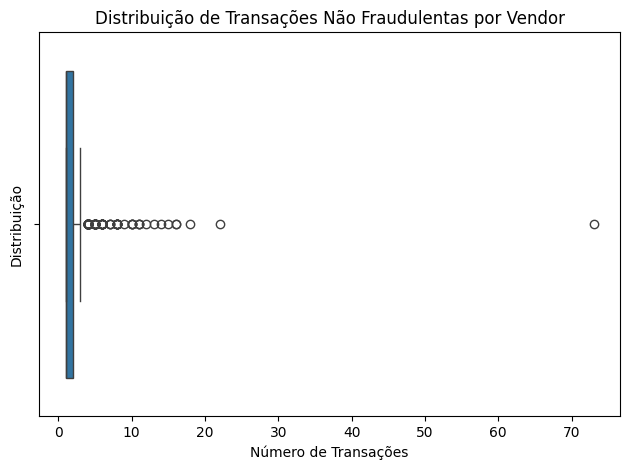

In [72]:
transaction_per_vendor = df[df["has_cbk"] == 0].groupby("merchant_id")["transaction_id"].count()

sns.boxplot(x=transaction_per_vendor)
plt.title("Distribuição de Transações Não Fraudulentas por Vendor")
plt.xlabel("Número de Transações")
plt.ylabel("Distribuição")

plt.tight_layout()
plt.show()

### ☝️ Conclusion: 20 out of the 391 vendors with fraudulent transactions account for 52% of all fraud cases. Pay special attention to vendors 17275, 4705, and 1308, with 22, 19, and 15 fraudulent transactions, respectively, this month.

### 👇 Fraudulent Transactions per Device

In [73]:
frauds_per_device = df[(df["has_cbk"] == 1) & (df["device_id_missing"] == 0)].groupby("device_id")["transaction_id"].count()
#Filtering note: has_cbk fraud and the device is not missing !
frauds_per_device

device_id
486.0       4
6638.0      1
10312.0     2
17372.0     2
20098.0     3
           ..
960729.0    6
972377.0    1
977260.0    1
978084.0    4
990288.0    1
Name: transaction_id, Length: 129, dtype: int64

In [74]:
frauds_per_device_sorted = frauds_per_device.sort_values(ascending=False)
frauds_per_device_sorted

device_id
563499.0    19
342890.0    15
101848.0    15
438940.0    13
547440.0    12
            ..
892328.0     1
918124.0     1
972377.0     1
977260.0     1
990288.0     1
Name: transaction_id, Length: 129, dtype: int64

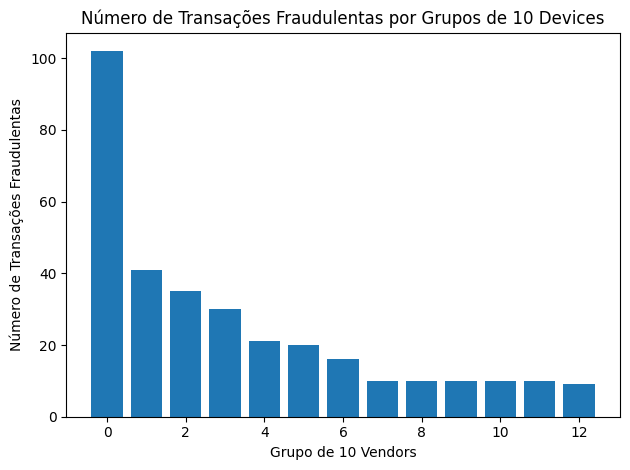

In [75]:
grouped_frauds_device_id = frauds_per_device_sorted.groupby(np.arange(len(frauds_per_device_sorted)) // 10).sum()

plt.bar(range(len(grouped_frauds_device_id)), grouped_frauds_device_id)
plt.title("Número de Transações Fraudulentas por Grupos de 10 Devices")
plt.xlabel("Grupo de 10 Vendors")
plt.ylabel("Número de Transações Fraudulentas")

plt.tight_layout()
plt.show()

In [76]:
frauds_per_device_sorted.iloc[:25].sum()

np.int64(163)

In [77]:
frauds_per_device_sorted.sum()

np.int64(324)

In [78]:
frauds_per_device_sorted.iloc[:25].sum() / frauds_per_device_sorted.sum()

np.float64(0.5030864197530864)

In [79]:
frauds_per_device_sorted.iloc[:6]

device_id
563499.0    19
342890.0    15
101848.0    15
438940.0    13
547440.0    12
960729.0     6
Name: transaction_id, dtype: int64

In [80]:
len(frauds_per_device)

129

In [82]:
frauds_per_device_sorted.index

Index([563499.0, 342890.0, 101848.0, 438940.0, 547440.0, 960729.0, 542535.0,
       357277.0, 308950.0, 597308.0,
       ...
       866529.0, 857439.0, 890266.0, 873893.0, 917759.0, 892328.0, 918124.0,
       972377.0, 977260.0, 990288.0],
      dtype='float64', name='device_id', length=129)

### ☝️  Conclusion: 26 out of the 129 devices with fraudulent transactions account for 50% of all fraud cases. Special attention should be given to devices 563499, 342890, and 101848, which have 19, 15, and 15 fraudulent transactions, respectively, this month.

### 👇 Transaction time 

FRAUD

In [83]:
device_fraud = frauds_per_device_sorted.index

In [84]:
df.tail(2)

,transaction_id,merchant_id,user_id,card_number,transaction_date,transaction_amount,device_id,has_cbk,device_id_missing
3197,21323595,35930,7,544315******7773,2019-11-01 01:29:45.799767,359.68,NaN,0,1
3198,21323596,17348,8,650487******9884,2019-11-01 01:27:15.811098,2416.70,NaN,0,1


In [85]:
df_filtered = df[df['device_id_missing'] == 0].copy()

In [86]:
#Sort info by device and transaction
df_filtered = df_filtered.sort_values(by=['device_id', 'transaction_date'])
#time diff in hours since last transaction
df_filtered['time_since_last_transaction'] = df_filtered.groupby('device_id')['transaction_date'].diff().dt.total_seconds() /60

In [87]:
df_filtered.head(1)

,transaction_id,merchant_id,user_id,card_number,transaction_date,transaction_amount,device_id,has_cbk,device_id_missing,time_since_last_transaction
2729,21323127,33192,34548,523421******6253,2019-11-12 21:47:21.506873,241.1,2.0,0,0,NaN


In [88]:
#se nao ha transacao antes, preencher com -1
df_filtered['time_since_last_transaction'] = df_filtered['time_since_last_transaction'].fillna(-1)

In [89]:
df_filtered.tail(2)

,transaction_id,merchant_id,user_id,card_number,transaction_date,transaction_amount,device_id,has_cbk,device_id_missing,time_since_last_transaction
2583,21322981,92441,13921,550209******6868,2019-11-16 22:37:33.291625,157.58,999683.0,0,0,-1.0
644,21321042,94371,33270,498406******2126,2019-11-29 15:04:49.565424,438.07,999843.0,0,0,-1.0


In [90]:
# Filtrar o DataFrame para incluir apenas os devices suspeitos
df_suspect = df_filtered[df_filtered['device_id'].isin(device_fraud)]

In [219]:
# media removendo os -1
average_fraud = df_suspect[df_suspect['time_since_last_transaction'] != -1]['time_since_last_transaction'].median()

# Exibir o resultado
print(f" Median time for last time transactions for bad guys {average_fraud:.2f} mins.")
#18h

 Median time for last time transactions for bad guys 58.47 mins.


Transaction time - NON FRAUD

In [92]:
# ~ pode ser usado para negação! Interessante! Ou seja, os que nao estão na bandidos
df_non_suspect = df_filtered[~df_filtered['device_id'].isin(device_fraud)]
df_non_suspect.tail(2)

,transaction_id,merchant_id,user_id,card_number,transaction_date,transaction_amount,device_id,has_cbk,device_id_missing,time_since_last_transaction
2583,21322981,92441,13921,550209******6868,2019-11-16 22:37:33.291625,157.58,999683.0,0,0,-1.0
644,21321042,94371,33270,498406******2126,2019-11-29 15:04:49.565424,438.07,999843.0,0,0,-1.0


In [220]:

average_nonfraud = df_non_suspect[df_non_suspect['time_since_last_transaction'] != -1]['time_since_last_transaction'].median()

# Exibir o resultado
print(f"Median time for last time transactions for GOOD guys {average_nonfraud:.2f} mins")

Median time for last time transactions for GOOD guys 199.95 mins


In [94]:
fraud_persona_spent = median_fraud
fraud_persona_trans = frauds_per_device.mode()
fraud_persona_card = transaction_1card_yes_fraud.mode()

print(fraud_persona_spent)
print(fraud_persona_trans)
print(fraud_persona_card)

999.47
0    1
Name: transaction_id, dtype: int64
0    1
Name: transaction_id, dtype: int64


Persona Fraudster, em 1 mês: <br>
    - USD Spent (median): 999,47; <br>
    - # Transactions (mode): 1; <br>
    - # Credit Card (mode): 1; <br>
    - Ataca o vendor mais vulnerável: 17275; <br>
    - tem o Device: 563499; <br>

### ☝️ Conclusion Time: Median time for last time transactions for bad guys 58.47 mins. Median time for last time transactions for GOOD guys 199.95 mins


# 3. Machine Learning Model:
- Decision Tree it may be suitable because it handles with missing data (like the device); <br>
- Deep Learning perhaps can be a good model too to handle this problem; <br>

Source: <br>
(1) https://insidelearningmachines.com/decision_trees_handle_missing_values/ <br>
(2) https://xgboost.readthedocs.io/en/stable/faq.html

Model checkpoints
 - Preproc;
 - Cross Validation (X_train);
 - Choose;
 - Fit;
 - Scoring Fit (X_test);
 - Learning curve;
 - Confusion matrix;

In [98]:
df.head(5)

,transaction_id,merchant_id,user_id,card_number,transaction_date,transaction_amount,device_id,has_cbk,device_id_missing
0,21320398,29744,97051,434505******9116,2019-12-01 23:16:32.812632,374.56,285475.0,0,0
1,21320399,92895,2708,444456******4210,2019-12-01 22:45:37.873639,734.87,497105.0,1,0
2,21320400,47759,14777,425850******7024,2019-12-01 22:22:43.021495,760.36,NaN,0,1
3,21320401,68657,69758,464296******3991,2019-12-01 21:59:19.797129,2556.13,NaN,1,1
4,21320402,54075,64367,650487******6116,2019-12-01 21:30:53.347051,55.36,860232.0,0,0


Preproc of dataset: categorical, encoding

Feature engineering in date

In [99]:
df['transaction_year'] = df['transaction_date'].dt.year
df['transaction_month'] = df['transaction_date'].dt.month
df['transaction_day'] = df['transaction_date'].dt.day
df['transaction_day_of_week'] = df['transaction_date'].dt.dayofweek  #(0=monday, 6=sunday)
df['transaction_hour'] = df['transaction_date'].dt.hour
df['transaction_minute'] = df['transaction_date'].dt.minute
df['transaction_second'] = df['transaction_date'].dt.second
df = df.drop('transaction_date', axis=1)

df.head(2)

,transaction_id,merchant_id,user_id,card_number,transaction_amount,device_id,has_cbk,device_id_missing,transaction_year,transaction_month,transaction_day,transaction_day_of_week,transaction_hour,transaction_minute,transaction_second
0,21320398,29744,97051,434505******9116,374.56,285475.0,0,0,2019,12,1,6,23,16,32
1,21320399,92895,2708,444456******4210,734.87,497105.0,1,0,2019,12,1,6,22,45,37


In [100]:
df.tail(1)

,transaction_id,merchant_id,user_id,card_number,transaction_amount,device_id,has_cbk,device_id_missing,transaction_year,transaction_month,transaction_day,transaction_day_of_week,transaction_hour,transaction_minute,transaction_second
3198,21323596,17348,8,650487******9884,2416.7,NaN,0,1,2019,11,1,4,1,27,15


Editing card number to remove ****

In [101]:
df["card_number"] = df["card_number"].apply(lambda x: ''.join(x.split("******"))).astype(float)
df.tail(1)

,transaction_id,merchant_id,user_id,card_number,transaction_amount,device_id,has_cbk,device_id_missing,transaction_year,transaction_month,transaction_day,transaction_day_of_week,transaction_hour,transaction_minute,transaction_second
3198,21323596,17348,8,6.504880e+09,2416.7,NaN,0,1,2019,11,1,4,1,27,15


In [102]:
# Preproc Notes:
# Despite of no specific conclusion in dataviz for time in transaction, I will feature engineering and split here the date for possible ML enhancement - won't use time series;
# Since the device_id it is important, I have decided not to drop it and make a feature engineering creating a categorical device_id_missing to enhance the model
# Despite of all other features are categorical, I won't label encode them because of the huge amount of unique cat

Scaling of the dataset

- Only on the transaction amount

In [103]:
scaler = StandardScaler()
df['transaction_scaled'] = scaler.fit_transform(df[['transaction_amount']])
df = df.drop('transaction_amount', axis=1)
df.tail(1)

,transaction_id,merchant_id,user_id,card_number,device_id,has_cbk,device_id_missing,transaction_year,transaction_month,transaction_day,transaction_day_of_week,transaction_hour,transaction_minute,transaction_second,transaction_scaled
3198,21323596,17348,8,6.504880e+09,NaN,0,1,2019,11,1,4,1,27,15,1.854856


In [135]:
X = df.drop('has_cbk', axis=1).values
#X = df.drop(['has_cbk', 'device_id_missing', 'device_id'], axis=1).values
y = df["has_cbk"]

In [137]:
# from imblearn.over_sampling import SMOTE

# smote = SMOTE(random_state=42)
# X_balanced, y_balanced = smote.fit_resample(X, y)

In [138]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
#X_train, X_test, y_train, y_test = train_test_split(X_balanced, y_balanced, test_size=0.3, random_state=42)

In [108]:
model_random = RandomForestClassifier(random_state=42, class_weight='balanced')
cv_results = cross_validate(model_random, X_train, y_train, cv=5, scoring='accuracy')
cv_results

{'fit_time': array([0.52663732, 0.48108101, 0.55679393, 0.48470569, 0.51748896]),
 'score_time': array([0.01003408, 0.00934768, 0.00949764, 0.01176047, 0.00988436]),
 'test_score': array([0.91867853, 0.9351145 , 0.94529262, 0.94274809, 0.94783715])}

In [109]:
cv_results["test_score"].mean()

np.float64(0.9379341784920996)

In [110]:
model_decision = DecisionTreeClassifier(random_state=42, class_weight='balanced')
cv_results_2 = cross_validate(model_decision, X_train, y_train, cv=5, scoring='accuracy')
cv_results_2["test_score"].mean()

np.float64(0.8552537901199841)

In [217]:
# model_decision.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', random_state=42)

In [139]:
num_0 = len(y[y == 0])
num_1 = len(y[y == 1]) #inverso do minoritário sobre o majoritario
scale_pos_weight = num_0 / num_1
scale_pos_weight

7.181585677749361

In [111]:
#model_xgb = XGBClassifier(random_state=42, scale_pos_weight=scale_pos_weight, missing=np.nan)
model_xgb = XGBClassifier(random_state=42)
cv_results_3 = cross_validate(model_xgb, X_train, y_train, cv=5, scoring='accuracy')
cv_results_3["test_score"].mean()

np.float64(0.9537002369936403)

In [112]:
model_log = LogisticRegression(max_iter=1000, solver='lbfgs', random_state=42)
cv_results_4 = cross_validate(model_log, X_train, y_train, cv=5, scoring='accuracy')
cv_results_3["test_score"].mean()

np.float64(0.9537002369936403)

In [113]:
model_log.fit(X_train, y_train)
model_log.score(X_test, y_test)

0.5008902077151335

In [154]:
# model_xgb.fit(X_train, y_train)
# model_xgb.score(X_test, y_test)
# model_xgb = XGBClassifier(
#     max_depth=4, #3             # profundidades
#     min_child_weight=2, #2      # peso  para divisões
#     max_leaves=3, #2
#     gamma=0.05,                # ganho para dividir um nó
#     learning_rate=0.015,       # learning rate IMPORTANTE: quanto maior, mais complexo!!!
#     n_estimators=1000,
#     scale_pos_weight=scale_pos_weight,  # cuidado ao usar isso, se for SMOTE, nao usar!
#     missing=np.nan,
#     random_state=42
# )

In [169]:
# model_xgb.fit(X_train, y_train)
# model_xgb.score(X_test, y_test)
model_xgb = XGBClassifier(
    max_depth=4, #3             # Limitar a profundidade das árvores
    min_child_weight=3, #2       # Aumentar o peso mínimo para divisões
    max_leaves=4, #2
    gamma=0.05,                # Aumentar o ganho mínimo para dividir um nó
    learning_rate=0.015,       # Reduzir a taxa de aprendizado
    n_estimators=1000,        # Definir um número alto de estimadores
    scale_pos_weight=scale_pos_weight,  # Balanceamento da classe
    missing=np.nan,
    random_state=42
)

In [170]:
model_xgb.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.05, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.015, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=4, max_leaves=4,
              min_child_weight=3, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=1000, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

In [185]:
y_pred = model_xgb.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.8041666666666667

In [196]:
f1 = f1_score(y_test, y_pred)
f1

np.float64(0.517948717948718)

In [197]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.81      0.88       829
           1       0.39      0.77      0.52       131

    accuracy                           0.80       960
   macro avg       0.67      0.79      0.70       960
weighted avg       0.88      0.80      0.83       960



In [172]:
# sizes = np.arange(100, 4000, 100)
sizes = np.arange(50, 800, 50)

cv = StratifiedKFold(n_splits=5)
#train_sizes, train_scores, test_scores = learning_curve(model_xgb, X_balanced, y_balanced , train_sizes=sizes, cv=cv)
train_sizes, train_scores, test_scores = learning_curve(model_xgb, X, y , train_sizes=sizes, cv=cv)
#train_sizes, train_scores, test_scores = learning_curve(model_log, X_balanced, y_balanced , train_sizes=sizes, cv=cv)
#train_sizes, train_scores, test_scores = learning_curve(model_xgb, X_balanced, y_balanced, train_sizes=sizes, cv=cv)
#train_sizes, train_scores, test_scores = learning_curve(model_random, X_balanced, y_balanced, train_sizes=sizes, cv=cv)
#train_sizes, train_scores, test_scores = learning_curve(model_random, X, y, train_sizes=sizes, cv=cv)
#train_sizes, train_scores, test_scores = learning_curve(model_decision, X, y, train_sizes=sizes, cv=cv)
#train_sizes, train_scores, test_scores = learning_curve(model_decision, X_balanced, y_balanced, train_sizes=sizes, cv=cv)

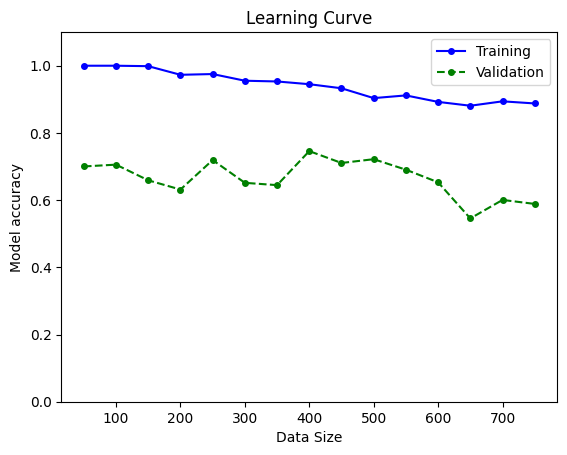

In [173]:
train_scores_mean = np.mean(train_scores, axis=1)
tests_scores_mean = np.mean(test_scores, axis=1)

plt.plot(train_sizes, train_scores_mean, color='blue', marker='o', markersize=4, label='Training')

plt.plot(train_sizes, tests_scores_mean, color='green', marker='o', markersize=4, linestyle='--', label='Validation')

plt.title('Learning Curve')
plt.xlabel('Data Size')
plt.ylabel('Model accuracy')
plt.ylim(0, 1.1)
plt.legend()
plt.show()

### Despite of delivering 0.80 Accurancy (lower than other models), the XGBoost didn't Overfitted as the others, beeing suitable for our problem.

## Confusion Matrix for sanity check

In [177]:
matrix = confusion_matrix(y_test, y_pred)
matrix

array([[671, 158],
       [ 30, 101]])

In [210]:
matrix_percent = np.round((matrix.astype('float') / matrix.sum(axis=1)[:, np.newaxis]) * 100)
matrix_percent

array([[81., 19.],
       [23., 77.]])

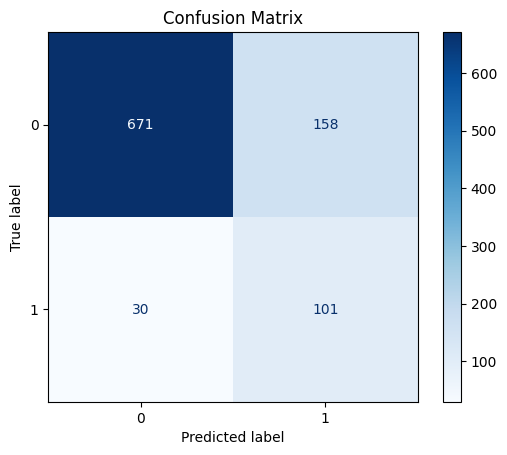

In [179]:
disp = ConfusionMatrixDisplay(confusion_matrix=matrix, display_labels=model_xgb.classes_)
disp.plot(cmap=plt.cm.Blues)

plt.title('# Confusion Matrix')
plt.show()

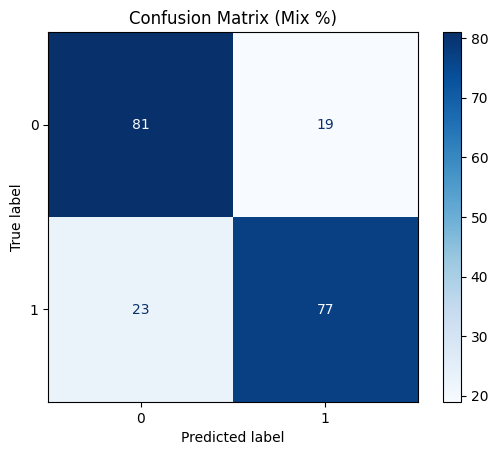

In [212]:
disp = ConfusionMatrixDisplay(confusion_matrix=matrix_percent, display_labels=model_xgb.classes_)
disp.plot(cmap=plt.cm.Blues)

plt.title('Confusion Matrix (Mix %)')
plt.show()

### Analysis of confusion matrix: 
- Goal of the model attended: detect and diminuir Falsos Negativos (30);
- O modelo está captando bem as Fraudes True Positives (101), assim como também Não Fraudes True Positives (671); 
- Apesar disso, o modelo apresenta Fraudes True Positive (158), mas acaba que não é algo tão grave assim. 

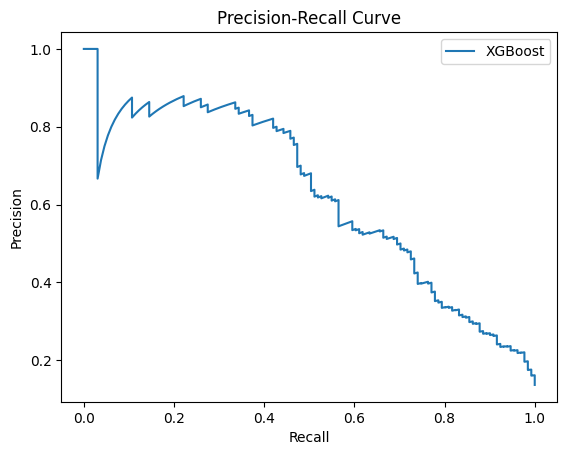

In [184]:
# Obter as probabilidades previstas para a classe positiva (fraude)
y_scores = model_xgb.predict_proba(X_test)[:, 1]

# Calcular precisão e revocação em vários limiares
precision, recall, thresholds = precision_recall_curve(y_test, y_scores)

# Plotar a curva Precision-Recall
plt.plot(recall, precision, label='XGBoost')
plt.title('Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend();

In [189]:
# Calcular precisão, recall e limiares
precision, recall, thresholds = precision_recall_curve(y_test, y_scores)

# Calcular o F1-score para cada limiar
f1_scores = 2 * (precision * recall) / (precision + recall)

# Encontrar o índice do F1-score máximo
max_f1_index = f1_scores.argmax()
best_threshold = thresholds[max_f1_index]

print(f"Limiar ideal (que maximiza o F1-score): {best_threshold:.2f}")

Limiar ideal (que maximiza o F1-score): 0.63


In [ ]:
#Acima conseguimos identificar que o objetivo para nosso problema é maximizar o RECALL

In [205]:
proba = model_xgb.predict_proba(X_test)[:, 1]

# Aplicar o limiar de 0.63 para classificar as transações
y_pred_2 = (proba >= 0.63).astype(int)

# Avaliar o desempenho com o novo limiar
print(classification_report(y_test, y_pred_2))

              precision    recall  f1-score   support

           0       0.94      0.91      0.93       829
           1       0.53      0.66      0.59       131

    accuracy                           0.88       960
   macro avg       0.74      0.79      0.76       960
weighted avg       0.89      0.88      0.88       960



In [206]:
f1_2 = f1_score(y_test, y_pred_2)
f1_2

np.float64(0.5918367346938775)

In [207]:
accuracy_2 = accuracy_score(y_test, y_pred_2)
accuracy_2

0.875

In [208]:
matrix_2 = confusion_matrix(y_test, y_pred_2)
matrix_2

array([[753,  76],
       [ 44,  87]])

In [216]:
matrix_2_percent = np.round((matrix_2.astype('float') / matrix.sum(axis=1)[:, np.newaxis]) * 100)
matrix_2_percent

array([[91.,  9.],
       [34., 66.]])

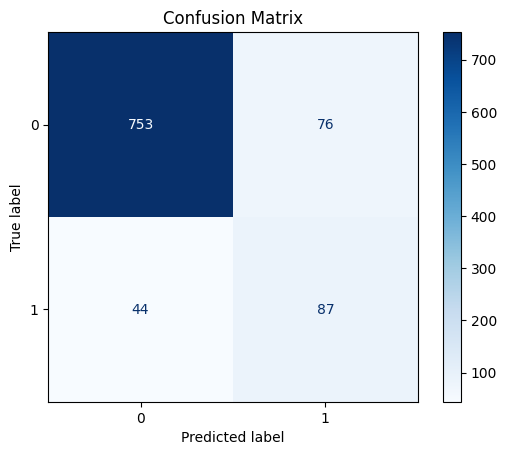

In [217]:
disp = ConfusionMatrixDisplay(confusion_matrix=matrix_2, display_labels=model_xgb.classes_)
disp.plot(cmap=plt.cm.Blues)

plt.title('# Confusion Matrix v2');

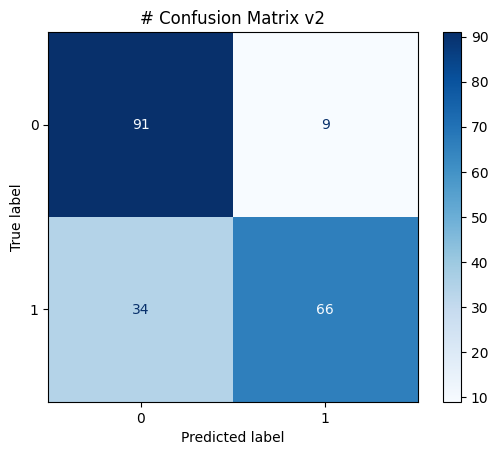

In [218]:
disp = ConfusionMatrixDisplay(confusion_matrix=matrix_2_percent, display_labels=model_xgb.classes_)
disp.plot(cmap=plt.cm.Blues)

plt.title('# Confusion Matrix v2');

Conclusion: 
- Adjusting the proba threshold for maximizing the F1 Score, edditing proba from 0,5 to 0,63 will elevate the F1 score from 0,51 to 0,59 but will decrease the Recall for class 1 (most important) from 0,77 to 0,66, wich it is really bad for our problem. 

- Saying that, we will keep the classic proba threshold of 0,5, mantaninig the F1 of 0,51 and Recall of class 1 of 0,77. 

In [174]:
# import joblib
# joblib.dump(model_xgb, 'data/modelo_xgb-fernando_cirone.pkl')

# # for loading afterwards:
# modelo_carregado = joblib.load('data/modelo_xgb.pkl')

['data/modelo_xgb.pkl']

# JOB DONE ! 💪

________________________________________________

## Made by: Fernando Cirone.
#### [LinkInd](https://www.linkedin.com/in/fernandocirone/) | [GitHub](https://github.com/thecirocks) | [Portfolio](https://troopl.com/fernandocirone) | [E-mail](mailto:fernando.cirone@hotmail.com) | [WhatsApp](https://api.whatsapp.com/send?phone=5521984316148) 